In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys, joblib, json

In [8]:
data = {}
for i in glob('*/*results.json'):
    with open(i) as f:
       data[i.split('/')[0].replace('_',' ')]=json.load(f)

# with open('state_vector/IQP_Full-Pauli-CRX/') as f:
#    data['state_vector']=json.load(f)

In [9]:
data_df = pd.DataFrame.from_dict(data).T.reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test'])

In [10]:
data_df.sort_values(by='value')

,index,variable,value
0,TREX,R2_train,-0.18237
2,without,R2_train,-0.180711
6,without,R2_test,-0.008183
4,TREX,R2_test,0.026692
3,state vector,R2_train,0.264522
7,state vector,R2_test,0.364323
5,AL5 RUD1,R2_test,0.715204
1,AL5 RUD1,R2_train,0.808629


([0, 1, 2, 3],
 [Text(0, 0, 'TREX'),
  Text(1, 0, 'AL5 RUD1'),
  Text(2, 0, 'without'),
  Text(3, 0, 'state vector')])

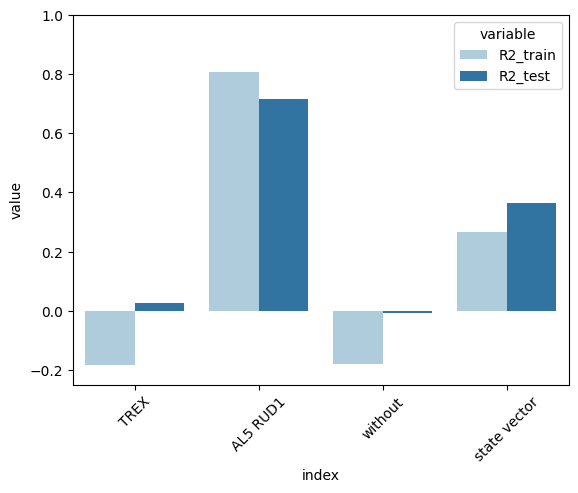

In [11]:
sns.barplot(data=data_df,x='index',y='value',hue='variable',palette=sns.color_palette('Paired',2))
plt.ylim(-0.25,1)
plt.xticks(rotation=45)